In [20]:
import pandas as pd
import numpy as np
import imblearn
import sys
import os
sys.path.append('../src/')
import dataset_prep

In [3]:
# Chemin du dossier contenant tous les .csv
data_folder = '../data'

In [69]:
#Colonnes choisies - label, sender & sendTime obligatoires

selected_columns = [
"nb_packets_sent",
"distance",
"distRealSR1",
"pos_y_rec_f",
"pos_y_rec",
"pos_x_rec_f",
"pos_x_rec",
"pos_x_send",
"pos_y_send",
"spd_x_send",
"spd_y_send",
"sendTime",
"receiver",
"sender",
"label"
]

# selected_columns = [
# "distance",
# "pos_x_send",
# "pos_y_send",
# "spd_x_send",
# "spd_y_send",
# "sendTime",
# "sender",
# "label"
# ]

input_sequence_shape = len(selected_columns)-2 # On drop label et sender dans la création de séquences

data_type = {
    "label":"int8",
    "sender":"int16",
    "receiver":"int16",
    "nb_packets_sent":"int16"
}

In [70]:
# DoS (13)
df = dataset_prep.import_dataset(data_folder + '/DoS_0709_new_columns.csv', selected_columns, data_type)

Nombre de lignes avant nettoyage :  4753433
Nombre de lignes après nettoyage :  4709293


In [ ]:
# DoS 14
df_14 = dataset_prep.import_dataset(data_folder + '/merged2.csv', selected_columns, data_type)

In [71]:
df.label.value_counts()

13    2648034
0     2061259
Name: label, dtype: int64

Sampling des données

In [95]:
copied_df = df.copy()
copied_df.head()

,sendTime,sender,receiver,pos_x_send,pos_y_send,spd_x_send,spd_y_send,label,pos_x_rec,pos_y_rec,pos_x_rec_f,pos_y_rec_f,nb_packets_sent,distRealSR1,distance
0,25279.602882,9,21,160.047145,888.940547,-9.175586,-1.158490,0,201.847606,558.555920,201.743061,558.565554,96,41.800461,333.018438
1,25280.602880,9,21,152.997377,889.043468,-6.885990,0.200153,0,201.743061,558.565554,202.047854,557.289911,96,48.745684,334.053579
2,25281.602878,9,21,146.221282,893.000018,-6.950648,5.546115,0,202.047854,557.289911,202.496427,553.989553,96,55.826572,340.320264
3,25282.602871,9,21,143.631105,902.448140,-1.436617,10.739371,0,202.496427,553.989553,203.426061,548.666187,96,58.865321,353.395690
4,25212.602877,9,45,257.604242,141.917136,-2.409908,14.316189,0,265.540271,46.207434,268.539855,49.801087,96,7.936029,96.038156


In [97]:
# Augmente le nombre des données minoritaires
# oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')

# define undersample strategy
undersample = imblearn.under_sampling.RandomUnderSampler(sampling_strategy='majority')

In [98]:
copied_df.label.value_counts()

13    2648034
0     2061259
Name: label, dtype: int64

In [99]:
sample_columns, sample_label = undersample.fit_resample(copied_df.drop(["label"], axis=1), copied_df['label'])

In [100]:
unique, counts = np.unique(sample_label, return_counts=True)
print(unique, counts)

[ 0 13] [2061259 2061259]


In [101]:
sampled_df = pd.concat([sample_columns, sample_label], axis=1)

In [102]:
sampled_df.head()

,sendTime,sender,receiver,pos_x_send,pos_y_send,spd_x_send,spd_y_send,pos_x_rec,pos_y_rec,pos_x_rec_f,pos_y_rec_f,nb_packets_sent,distRealSR1,distance,label
0,25279.602882,9,21,160.047145,888.940547,-9.175586,-1.158490,201.847606,558.555920,201.743061,558.565554,96,41.800461,333.018438,0
1,25280.602880,9,21,152.997377,889.043468,-6.885990,0.200153,201.743061,558.565554,202.047854,557.289911,96,48.745684,334.053579,0
2,25281.602878,9,21,146.221282,893.000018,-6.950648,5.546115,202.047854,557.289911,202.496427,553.989553,96,55.826572,340.320264,0
3,25282.602871,9,21,143.631105,902.448140,-1.436617,10.739371,202.496427,553.989553,203.426061,548.666187,96,58.865321,353.395690,0
4,25212.602877,9,45,257.604242,141.917136,-2.409908,14.316189,265.540271,46.207434,268.539855,49.801087,96,7.936029,96.038156,0


In [79]:
sampled_df.loc[0:20]

,sendTime,sender,receiver,pos_x_send,pos_y_send,spd_x_send,spd_y_send,pos_x_rec,pos_y_rec,pos_x_rec_f,pos_y_rec_f,nb_packets_sent,distRealSR1,distance,label
0,25279.602882,9,21,160.047145,888.940547,-9.175586,-1.158490,201.847606,558.555920,201.743061,558.565554,96,41.800461,333.018438,0
1,25280.602880,9,21,152.997377,889.043468,-6.885990,0.200153,201.743061,558.565554,202.047854,557.289911,96,48.745684,334.053579,0
2,25281.602878,9,21,146.221282,893.000018,-6.950648,5.546115,202.047854,557.289911,202.496427,553.989553,96,55.826572,340.320264,0
3,25282.602871,9,21,143.631105,902.448140,-1.436617,10.739371,202.496427,553.989553,203.426061,548.666187,96,58.865321,353.395690,0
4,25212.602877,9,45,257.604242,141.917136,-2.409908,14.316189,265.540271,46.207434,268.539855,49.801087,96,7.936029,96.038156,0
5,25213.602877,9,45,255.242943,156.206787,-2.566640,14.210027,268.539855,49.801087,268.050977,55.331302,96,13.296912,107.233302,0
6,25214.602878,9,45,252.857751,170.495740,-2.342829,14.254332,268.050977,55.331302,270.113953,63.318293,96,15.193227,116.162309,0
7,25215.602879,9,45,250.525544,184.832952,-2.352874,14.315002,270.113953,63.318293,268.836896,72.915064,96,19.588409,123.083379,0
8,25216.602880,9,45,248.511212,199.166902,-2.079440,14.360857,268.836896,72.915064,267.267270,84.617270,96,20.325683,127.877519,0
9,25217.602881,9,45,246.612236,213.485932,-2.108686,14.351979,267.267270,84.617270,264.934535,98.201431,96,20.655034,130.513458,0


Senders

In [103]:
senders = np.unique(df["sender"].values)
# senders

# Nombre de senders
print(len(senders))

4067


Séquence

In [104]:
def flat_sequence_creation(df):
    senders_sequences = []
    senders_label = []

    for sender in senders:
        # Données d'un seul sender rangée en fonction de l'heure d'envoi
        sender_data_sorted = df.loc[df['sender'] == sender].sort_values("sendTime")

        # On récupère la valeur du label pour ce sender
        """ On remplace toute les valeur !=0 en 1 """
        if sender_data_sorted['label'].tolist()[0] != 0 :
            label=1
        else :
            label = sender_data_sorted['label'].tolist()[0]
        #On supprime les colonnes label et sender
        sender_data_sorted = sender_data_sorted.drop(["label","sender"], axis=1)
        
        #sequence_array = []

        length = sender_data_sorted.shape[0]
        slide = 10
        start = 0
        end = 20

        # On vérifie qu'il est possible de faire une séquence de taille 20
        while length > 20:
            # Extraction par tranche de 20 avec une inter de 10
            sequence = sender_data_sorted[start:end]

            # Labels correspondant
            #labels =  pd.Series.tolist(sequence["label"])

            # On transforme les 13 en 1, cette formule marche toujours si on met d'autres types d'attaques
            #labels[:] = [x if x == 0 else 1 for x in labels]

            # Attribution des tableaux numpy
            senders_sequences.append(np.array(sequence.values.tolist(), dtype=np.float32))
            senders_label.append(label)

            # Mise à jour des variables
            start += slide
            end += slide
            length -= 10

    return senders_sequences, senders_label

In [105]:
#sorted_dataset = df.sort_values("sender")
sorted_dataset = sampled_df.sort_values("sender")

In [106]:
sequence_test, label_test = flat_sequence_creation(sorted_dataset)

In [107]:
len(sequence_test)

405972

Initialisation des données

In [108]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import layers, applications, utils, models, optimizers, Input, callbacks
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [109]:
# Transformation en array numpy
X = np.array(sequence_test)
y = np.array(label_test, dtype=np.float32)

In [110]:
# Séparation en données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [111]:
# Séparation en données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (365374, 20, 13)
y_train :  (365374,)
X_test :  (40598, 20, 13)
y_test :  (40598,)


Simple GRU

In [112]:
simple_GRU = keras.models.Sequential()
simple_GRU.add( keras.layers.Dense(32,input_shape=(20,input_sequence_shape), activation='relu'))
simple_GRU.add( keras.layers.Dropout(0.2) )
simple_GRU.add( keras.layers.BatchNormalization() )
simple_GRU.add( keras.layers.GRU(256, return_sequences=False, activation='relu') )
simple_GRU.add( keras.layers.Dropout(0.2) )
simple_GRU.add( keras.layers.BatchNormalization() )
# simple_GRU.add( keras.layers.Dense(64, activation='relu') )
# simple_GRU.add( keras.layers.Dropout(0.2) )
simple_GRU.add( keras.layers.Dense(1, activation='sigmoid') )
simple_GRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20, 32)            448       
                                                                 
 dropout_4 (Dropout)         (None, 20, 32)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 20, 32)           128       
 hNormalization)                                                 
                                                                 
 gru_2 (GRU)                 (None, 256)               222720    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [113]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
opt = keras.optimizers.SGD(learning_rate=0.01)
simple_GRU.compile(loss='binary_crossentropy', optimizer=opt, metrics='accuracy')

In [114]:
history = simple_GRU.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.3, callbacks=[callback])

Epoch 1/10
3997/3997 [==============================] - 344s 85ms/step - loss: 0.3949 - accuracy: 0.8223 - val_loss: 0.4395 - val_accuracy: 0.8055
Epoch 2/10
3997/3997 [==============================] - 409s 102ms/step - loss: 0.3684 - accuracy: 0.8365 - val_loss: 0.4507 - val_accuracy: 0.7942
Epoch 3/10
3997/3997 [==============================] - 287s 72ms/step - loss: 0.3621 - accuracy: 0.8386 - val_loss: 0.3906 - val_accuracy: 0.8278
Epoch 4/10
3997/3997 [==============================] - 278s 70ms/step - loss: 0.3564 - accuracy: 0.8417 - val_loss: 0.3464 - val_accuracy: 0.8487
Epoch 5/10
3997/3997 [==============================] - 415s 104ms/step - loss: 0.3551 - accuracy: 0.8415 - val_loss: 0.3647 - val_accuracy: 0.8368
Epoch 6/10
3997/3997 [==============================] - 348s 87ms/step - loss: 0.3524 - accuracy: 0.8439 - val_loss: 0.3464 - val_accuracy: 0.8523
Epoch 7/10
3997/3997 [==============================] - 474s 119ms/step - loss: 0.3501 - accuracy: 0.8452 - val_loss

<AxesSubplot:>

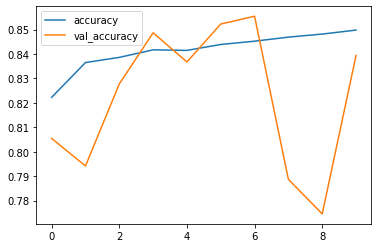

In [115]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

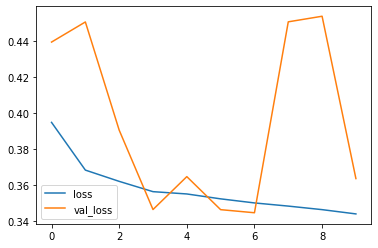

In [116]:
history_df.loc[:, ['loss', 'val_loss']].plot()

In [120]:
print(f"Evaluation du modèle : {simple_GRU.evaluate(X_test, y_test)}")
y_pred = simple_GRU.predict(X_test)
preds = np.round(y_pred).astype(int)

1269/1269 [==============================] - 37s 29ms/step - loss: 0.3604 - accuracy: 0.8420
Evaluation du modèle : [0.36041635274887085, 0.8419626355171204]
1269/1269 [==============================] - 26s 20ms/step


Text(33.0, 0.5, 'True Labels')

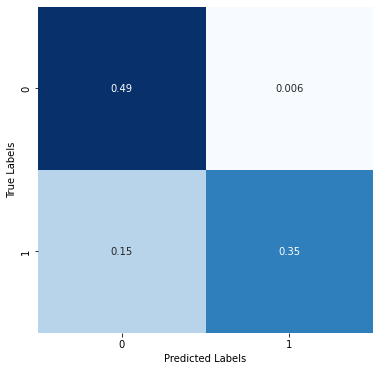

In [121]:
cm = confusion_matrix(y_test, preds, normalize='all')
fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(cm, annot=True, cbar=False, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')